# Daily Data

## Imports

In [77]:
#Pandas can be used to load, clean, merge, and preprocess the data before analysis.
import pandas as pd

# NumPy can help with calculations that involve datasets, like computing averages or handling missing values
import numpy as np

# datetime is crucial for converting date and time data into a format that can be analyzed, 
# such as transforming string representations of dates into datetime objects for time series analysis.
from datetime import datetime

# Seaborn and Matplotlib are visualization libraries. 
# Seaborn, which is based on matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics. 
# These libraries are used to plot data and findings, 
# like trends over time in bicycle usage or the relationship between weather conditions and cycling activity.
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator

# Time Series Analysis
# VAR model is used in time series analysis to capture the linear interdependencies among multiple time series.
from statsmodels.tsa.api import VAR
# The Augmented Dickey-Fuller test is a statistical test used to check stationarity in a time series. 
# A stationary time series is a requirement for many time series forecasting methods.
from statsmodels.tsa.stattools import adfuller
# This test is used to detect the presence of autocorrelation at lag 1 in the residuals from a regression analysis. 
# Autocorrelation can indicate that a model may be misspecified.
from statsmodels.stats.stattools import durbin_watson
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for stationarity check
from statsmodels.tsa.stattools import kpss

# Phillips-Perron (PP) Test for stationarity check
from arch.unitroot import PhillipsPerron

# Statistical Testing and Analysis
# The Shapiro-Wilk test (shapiro) is used for checking the normality of data distribution, which is important for many statistical methods and assumptions.
from scipy import stats
from scipy.stats import shapiro
# MinMaxScaler and StandardScaler for scaling data before training machine learning models
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# MAE and MSE are used to evaluate the performance of forecasting models by comparing the predicted values against the actual values.
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train_test_split is sed to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Prophet is a forecasting tool designed for handling the specifics of time series data that exhibits patterns on different time scales.
from prophet import Prophet
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
import tensorflow as tf
import keras
from tensorflow.keras import layers

## Data Loading

### Load and transform

In [78]:
# Load the data
muc_2008 = "./munich2008.csv"
muc_2009 = "./munich2009.csv"
muc_2010 = "./munich2010.csv"
muc_2011 = "./munich2011.csv"
muc_2012 = "./munich2012.csv"
muc_2013 = "./munich2013.csv"
muc_2014 = "./munich2014.csv"
muc_2015 = "./munich2015.csv"
muc_2016 = "./munich2016.csv"
muc_2017 = "./munich2017.csv"
muc_2018 = "./munich2018.csv"
muc_2019 = "./munich2019.csv"
muc_2020 = "./munich2020.csv"
muc_2021 = "./munich2021.csv"
muc_2022 = "./munich2022.csv"
muc_2023 = "./munich2023.csv"

# Read the data
df_muc_2008 = pd.read_csv(muc_2008)
df_muc_2009 = pd.read_csv(muc_2009)
df_muc_2010 = pd.read_csv(muc_2010)
df_muc_2011 = pd.read_csv(muc_2011)
df_muc_2012 = pd.read_csv(muc_2012)
df_muc_2013 = pd.read_csv(muc_2013)
df_muc_2014 = pd.read_csv(muc_2014)
df_muc_2015 = pd.read_csv(muc_2015)
df_muc_2016 = pd.read_csv(muc_2016)
df_muc_2017 = pd.read_csv(muc_2017)
df_muc_2018 = pd.read_csv(muc_2018)
df_muc_2019 = pd.read_csv(muc_2019)
df_muc_2020 = pd.read_csv(muc_2020)
df_muc_2021 = pd.read_csv(muc_2021)
df_muc_2022 = pd.read_csv(muc_2022)
df_muc_2023 = pd.read_csv(muc_2023)

# Change date format to YYYY-MM-DD
df_muc_2023['datum'] = df_muc_2023['datum'].apply(lambda x: datetime.strptime(x, '%Y.%m.%d').strftime('%Y-%m-%d'))

# Concatenate the data
df_munich = pd.concat(
    [df_muc_2008, 
     df_muc_2009, 
     df_muc_2010, 
     df_muc_2011, 
     df_muc_2012, 
     df_muc_2013, 
     df_muc_2014, 
     df_muc_2015,
     df_muc_2016,
     df_muc_2017,
     df_muc_2018,
     df_muc_2019,
     df_muc_2020,
     df_muc_2021,
     df_muc_2022, 
     df_muc_2023], 
    ignore_index=True)

# List of columns to drop, as they are not needed for the analysis and visualization of the data
columns_to_drop = ['uhrzeit_start', 'uhrzeit_ende', 'kommentar', 'richtung_1', 'richtung_2', 'bewoelkung', 'sonnenstunden']

# Rename the columns to make them more readable and easier to work with
df_munich = df_munich.rename(columns={
    'datum':'Date',
    'zaehlstelle': 'Location',
    'gesamt':'Total',
    'min.temp':'MinTemp',
    'max.temp':'MaxTemp',
    'niederschlag':'RainfallVolume'})

# Drop the columns that are not needed
df_munich = df_munich.drop(columns=columns_to_drop)

# Sort the data by date in ascending order to make it easier to work with the time series data later
df_munich = df_munich.sort_values(by='Date')

# Convert the date column to datetime format
df_munich['Date'] = pd.to_datetime(df_munich['Date'])

# Calculate average temperature from min and max temperature columns and add it to the dataframe as a new column called 'AvgTemp'
df_munich['AvgTemp'] = (df_munich['MinTemp'] + df_munich['MaxTemp']) / 2

# Save the cleaned data to a new CSV file
df_munich.to_csv('munich_bicycle_data_cleaned.csv', index=False)

# Create a new dataframe for the selected location (Erhardt) and reset the index
df_location_erhardt = df_munich[df_munich['Location']=='Erhardt'].reset_index()

# Drop the index column as it is not needed and rename the columns to make them more readable
df_location_erhardt = df_location_erhardt.drop(columns=['Location','index'])

# Round the average temperature to one decimal place
df_location_erhardt['AvgTemp'] = df_location_erhardt['AvgTemp'].round(1)

# Convert the date column to datetime format
df_location_erhardt['Date'] = pd.to_datetime(df_location_erhardt['Date'])

# Add a calculated column for the Day of the Week
df_location_erhardt['DayOfWeek'] = df_location_erhardt['Date'].dt.dayofweek + 1  # Adding 1 to have Monday as 1

# Add a calculated column for the Month
df_location_erhardt['Month'] = df_location_erhardt['Date'].dt.month

# Add a calculated column for the Year
df_location_erhardt['Year'] = df_location_erhardt['Date'].dt.year

df_m_e_model = df_location_erhardt[['Date','Total']]

# Set the date column as the index
df_m_e_model = df_m_e_model.set_index(['Date'])

# Set the date column as the index
df_location_erhardt = df_location_erhardt.set_index(['Date'])

# Set the frequency of the index to daily (D) as the data is daily
df_m_e_model.index.freq = 'D'

# Set the frequency of the index to daily (D) as the data is daily
df_location_erhardt.index.freq = 'D'

In [79]:
# Import the data for the weather conditions in Munich to df_munich using 'munich_bicycle_data_cleaned.csv
df_munich = pd.read_csv('munich_bicycle_data_cleaned.csv')

# Convert the date column to datetime format
df_munich['Date'] = pd.to_datetime(df_munich['Date'])

### Just Plot

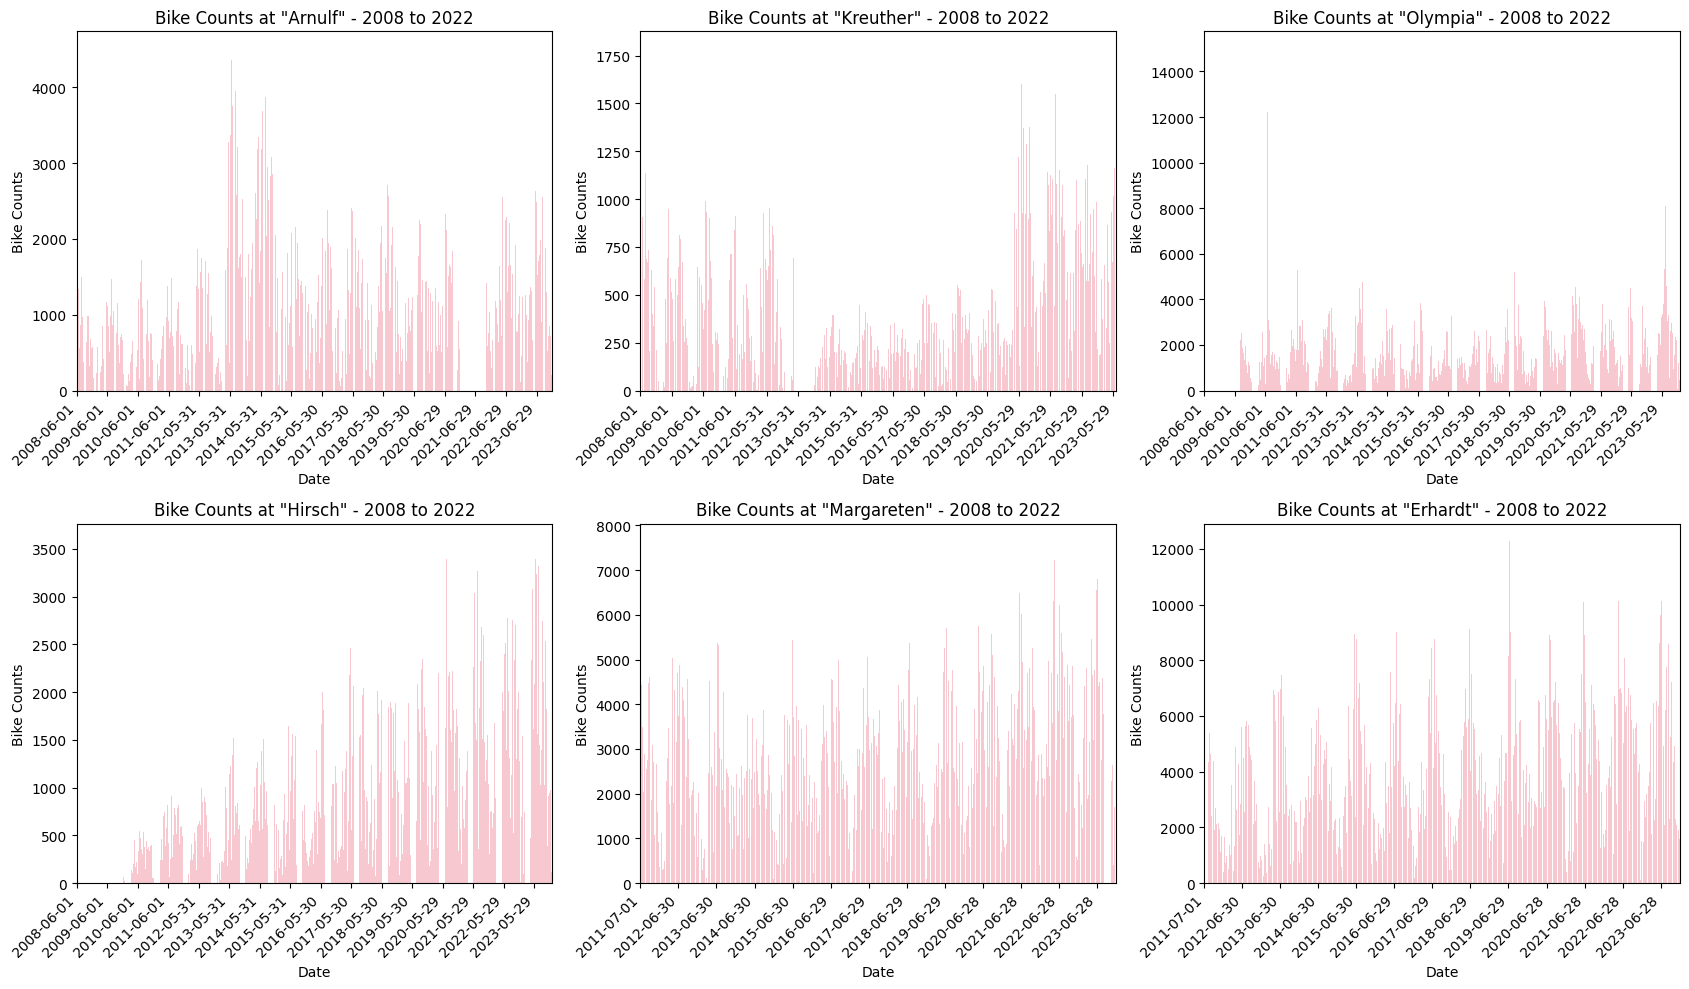

In [80]:
# Get list of unique locations names
unique_locations = df_munich['Location'].unique()

# Create a figure and six subplots
fig, axs = plt.subplots(2, 3, figsize=(17, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each unique location
for i, location in enumerate(unique_locations):
    # Filter the DataFrame for the current location
    df_location = df_munich[df_munich['Location'] == location]

    # Plotting
    # Set the current subplot
    plt.sca(axs[i])

    # Plot bike counts as a bar plot in grey color
    sns.barplot(data=df_location, x=df_location['Date'].dt.date, y='Total', color='pink')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    # Adjust layout to prevent overlap
    plt.gca().xaxis.set_major_locator(MultipleLocator(365))

    # Add title and labels
    plt.title(f'Bike Counts at "{location}" - 2008 to 2022')
    plt.xlabel('Date')
    plt.ylabel('Bike Counts')


plt.tight_layout()

# Show plot
plt.show()

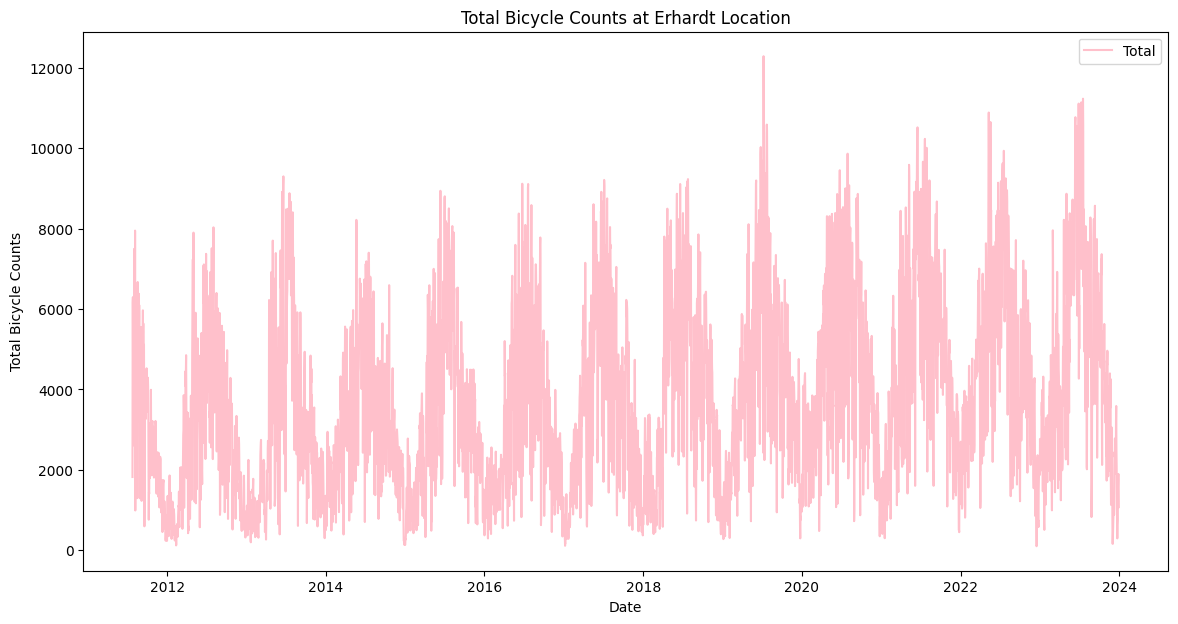

In [81]:
# Visualize the data for Erhardt location
plt.figure(figsize=(14,7))
plt.plot(df_location_erhardt['Total'], label='Total', color='pink')
plt.title('Total Bicycle Counts at Erhardt Location')
plt.xlabel('Date')
plt.ylabel('Total Bicycle Counts')
plt.legend()
plt.show()

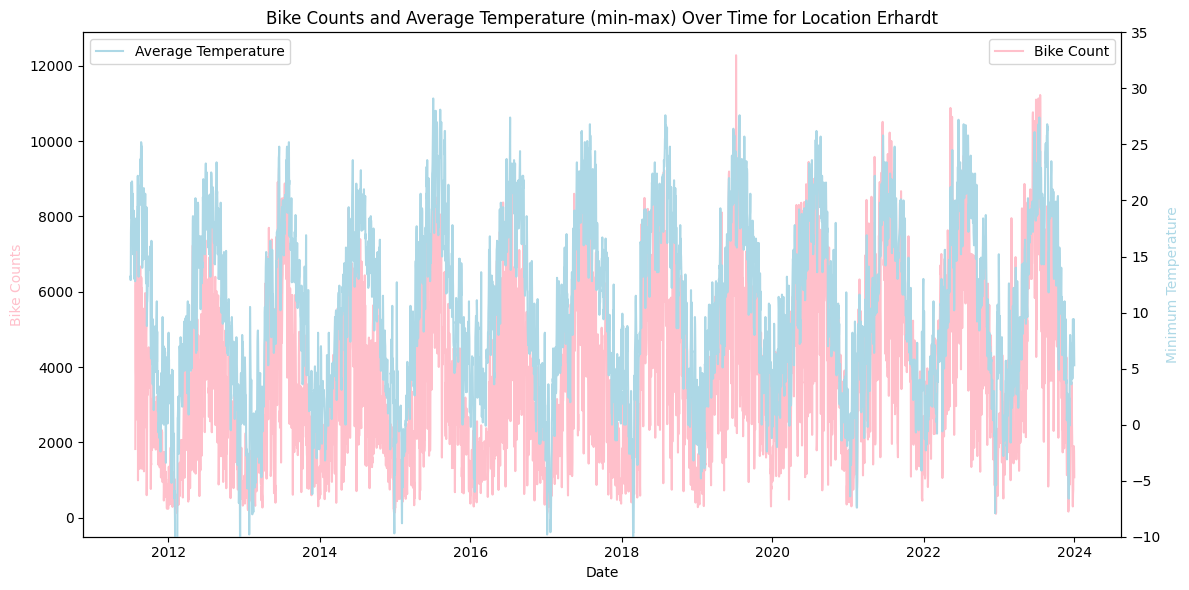

In [82]:
# Convert 'Date' to datetime
df_munich['Date'] = pd.to_datetime(df_munich['Date'], dayfirst=True)

# Filter the DataFrame to only include data on or after 2011-07-25
start_date = '2011-07-25'
df_munich_filtered = df_munich[df_munich['Date'] >= pd.to_datetime(start_date)]

# Create a figure with one subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot filtered bike counts for 'Erhardt' on the primary y-axis
sns.lineplot(data=df_location_erhardt, x='Date', y='Total', color='pink', ax=ax1, label= 'Bike Count')
ax1.set_ylabel('Bike Counts', color='pink')

# Create a secondary y-axis for temperature
ax2 = ax1.twinx()
sns.lineplot(data=df_location_erhardt, x='Date', y='AvgTemp', color='lightblue', label='Average Temperature')
ax2.set_ylabel('Minimum Temperature', color='lightblue')
# Set y-axis limits for the temperature plot
ax2.set_ylim(-10, 35)

# Set title and labels
plt.title('Bike Counts and Average Temperature (min-max) Over Time for Location Erhardt')
ax1.set_xlabel('Date')

# Show legend
ax2.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


### next step

In [83]:
# Calculate the mean, mode, and maximum values for the 'Total' column in the Erhardt location
mean_total = df_location_erhardt['Total'].mean()
mode_total = max(df_location_erhardt['Total'].mode())  # Using max to avoid the 0 value
max_total = df_location_erhardt['Total'].max()

# Print the calculated values
print(f"Mean value for 'Total' for all years in the location Erhardt in Munich: {mean_total:.2f}")
print(f"Mode value for 'Total' for all years in the location Erhardt in Munich: {mode_total}")
print(f"Max value for 'Total' for all years in the location Erhardt in Munich: {max_total}")

# Check when the maximum value occurred
max_total_date = df_location_erhardt[df_location_erhardt['Total'] == max_total].index[0].strftime('%Y-%m-%d')
print(f"The maximum value of {max_total} occurred on {max_total_date}")


Mean value for 'Total' for all years in the location Erhardt in Munich: 3836.12
Mode value for 'Total' for all years in the location Erhardt in Munich: 2199.0
Max value for 'Total' for all years in the location Erhardt in Munich: 12283.0
The maximum value of 12283.0 occurred on 2019-07-09


In [84]:
# save erhardt data to csv
df_location_erhardt.to_csv('erhardt_data.csv')

## From the Statistics Book

In [85]:
# Check missing values in the dataset and print the total number of missing values
missing_values = df_location_erhardt.isnull().sum().sum()
print(f"Total missing values in the dataset: {missing_values}")

# Show the rows with missing values
df_missing_values = df_location_erhardt[df_location_erhardt.isnull().any(axis=1)]
#print(df_missing_values)

# Remove the rows with missing values
df_location_erhardt_cleaned = df_location_erhardt.dropna()

# Check missing values in the cleaned dataset
missing_values_cleaned = df_location_erhardt_cleaned.isnull().sum().sum()
#print(f"Total missing values in the cleaned dataset: {missing_values_cleaned}")

# Replace old dataframe with cleaned dataframe
df_location_erhardt = df_location_erhardt_cleaned

# calculate the average total bike counts for the top 20 days with the largest number of bike counts
top_20_days = df_location_erhardt.nlargest(20, 'Total')
average_total_top_20_days = top_20_days['Total'].mean()

# Print the average total bike counts for the top 20 days
print(f"Average total bike counts for the top 20 days with the largest number of bike counts: {average_total_top_20_days:.2f}")

# calculate the average total bike counts for the 20 days with the most rainfall volume
top_20_rainfall_days = df_location_erhardt.nlargest(20, 'RainfallVolume')
average_total_top_20_rainfall_days = top_20_rainfall_days['Total'].mean()

# Print the average total bike counts for the 20 days with the most rainfall volume
print(f"Average total bike counts for the 20 days with the most rainfall volume: {average_total_top_20_rainfall_days:.2f}")

Total missing values in the dataset: 24
Average total bike counts for the top 20 days with the largest number of bike counts: 10678.80
Average total bike counts for the 20 days with the most rainfall volume: 3481.50


Correlation between 'Total' and 'AvgTemp': 0.76
Correlation between 'Total' and 'RainfallVolume': -0.16


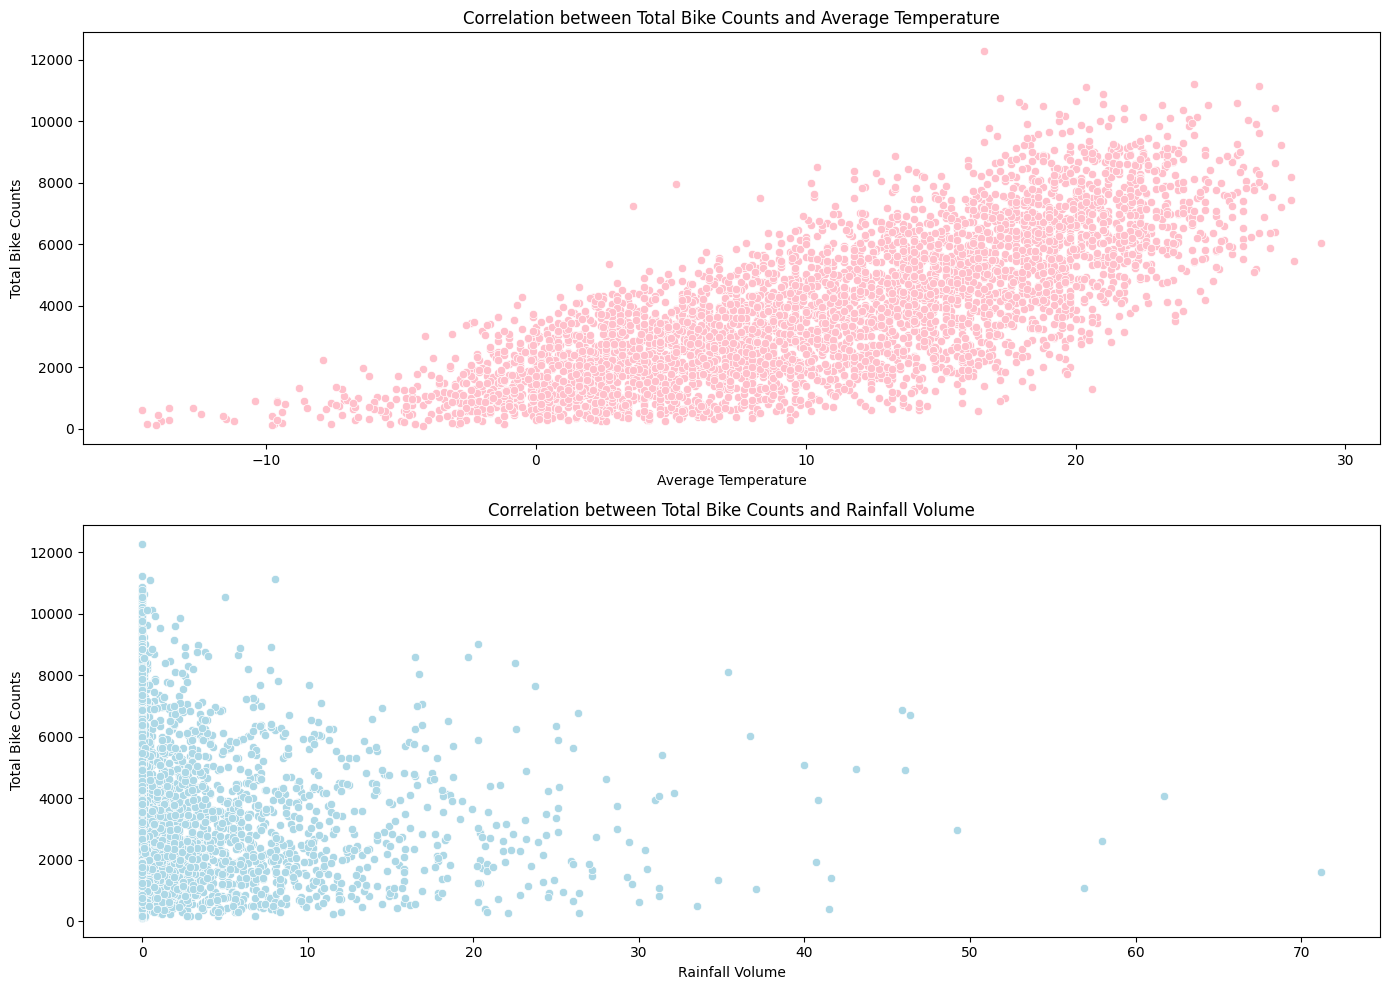

In [86]:
## Pearson Correlation
# Calculate the correlation between 'Total' and 'AvgTemp' columns
correlation_total_avgtemp = df_location_erhardt['Total'].corr(df_location_erhardt['AvgTemp'])

# Print the correlation value
print(f"Correlation between 'Total' and 'AvgTemp': {correlation_total_avgtemp:.2f}")

# Calculate the correlation between 'Total' and 'RainfallVolume' columns
correlation_total_rainfall = df_location_erhardt['Total'].corr(df_location_erhardt['RainfallVolume'])

# Print the correlation value
print(f"Correlation between 'Total' and 'RainfallVolume': {correlation_total_rainfall:.2f}")

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Plot the correlation between 'Total' and 'AvgTemp'
plt.sca(axs[0])
sns.scatterplot(data=df_location_erhardt, x='AvgTemp', y='Total', color='pink')
plt.title('Correlation between Total Bike Counts and Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Total Bike Counts')

# Plot the correlation between 'Total' and 'RainfallVolume'
plt.sca(axs[1])
sns.scatterplot(data=df_location_erhardt, x='RainfallVolume', y='Total', color='lightblue')
plt.title('Correlation between Total Bike Counts and Rainfall Volume')
plt.xlabel('Rainfall Volume')
plt.ylabel('Total Bike Counts')

plt.tight_layout()

# Show plot
plt.show()

From analyzing the plots:

1. **Correlation between Total Bike Counts and Average Temperature (Top Plot)**:
   - There appears to be a positive relationship between average temperature and total bike counts.
   - As the average temperature increases, the total bike counts also seem to increase, which suggests that warmer temperatures are associated with more people using bikes.
   - The spread of points suggests some variability in the data that isn't solely explained by temperature, indicating other factors may also influence bike counts.

2. **Correlation between Total Bike Counts and Rainfall Volume (Bottom Plot)**:
   - There seems to be a weak, if any, negative relationship between rainfall volume and total bike counts.
   - The data is quite spread out, particularly for lower values of rainfall volume, which indicates a lot of variance in bike counts that isn't explained by rainfall volume alone.
   - For higher values of rainfall, there are fewer bike counts, as indicated by fewer points at the right side of the plot, which might suggest that very high rainfall could be a deterrent for biking.

Both plots suggest that weather conditions have an impact on bike usage, with temperature having a more apparent effect than rainfall. However, the considerable spread of the points in both plots indicates that other factors also play a significant role in determining the total bike counts.

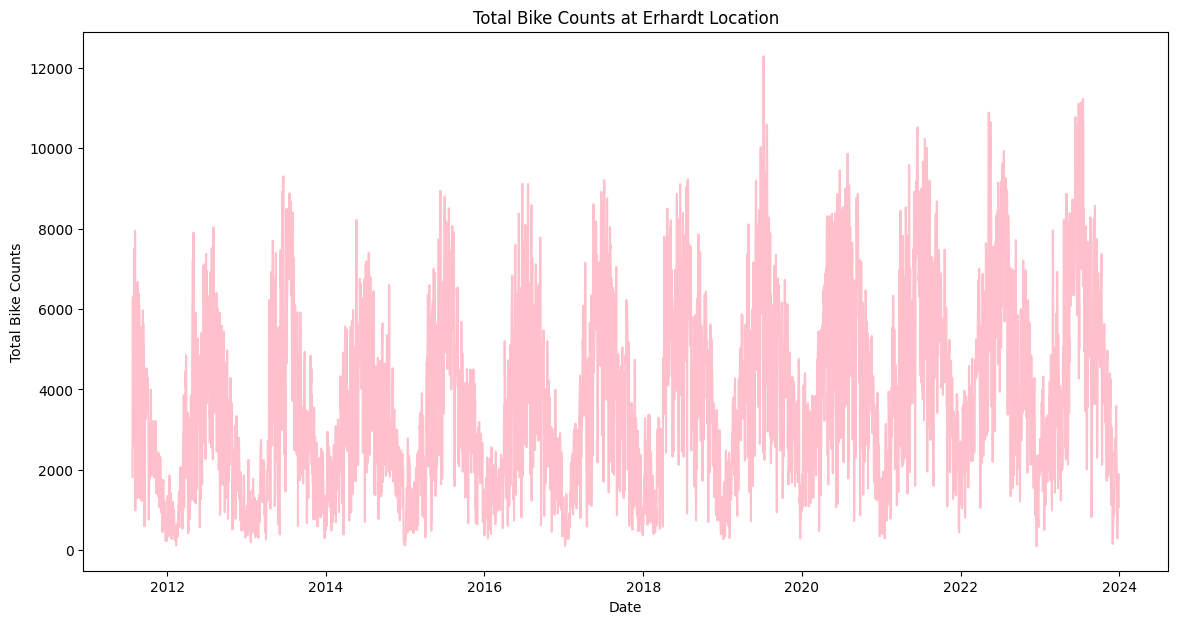

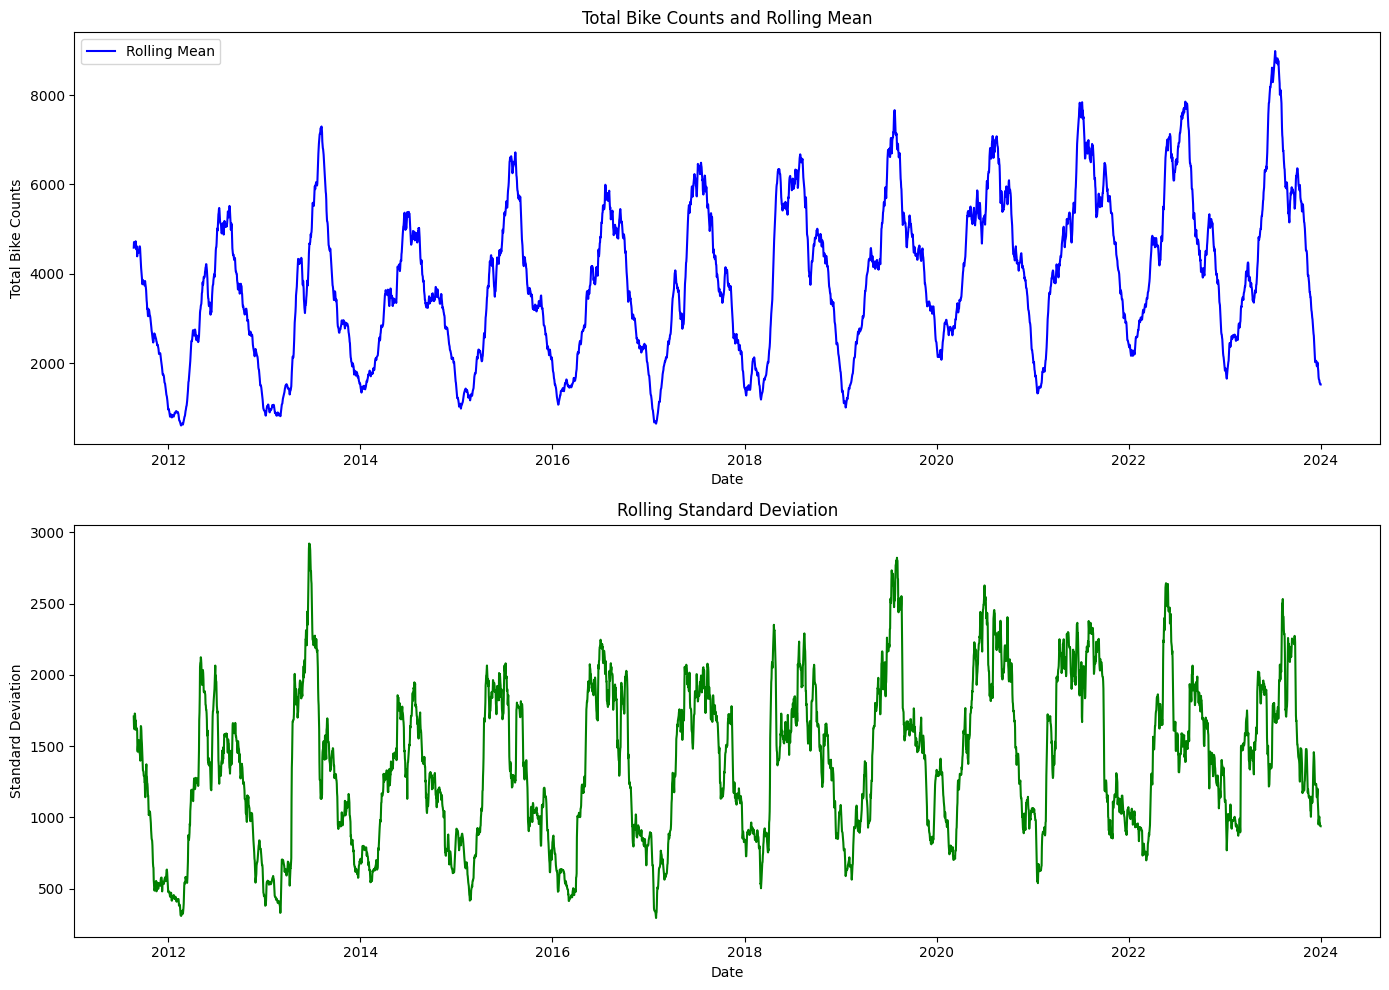

ADF Statistic: -4.4576142107782095
p-value: 0.00023438394614298713
ADF Statistic: -4.4576142107782095
p-value: 0.00023438394614298713
Critical Values:
	1%: -3.4317998168351687
	5%: -2.8621806470517406
	10%: -2.5671110198147815
Reject the null hypothesis: Data is stationary
ADF Statistic: -4.2871478843106985
p-value: 0.0004675355604961274
Critical Values:
	1%: -3.4317962896362406
	5%: -2.8621790888270993
	10%: -2.5671101902985627
Reject the null hypothesis: Data is stationary
ADF Statistic: -22.406727284923235
p-value: 0.0
Critical Values:
	1%: -3.431792461304648
	5%: -2.8621773975678
	10%: -2.567109289962098
Reject the null hypothesis: Data is stationary


In [87]:
# Visual inspection for stationarity using line plot
plt.figure(figsize=(14, 7))
plt.plot(df_location_erhardt['Total'], color='pink')
plt.title('Total Bike Counts at Erhardt Location')
plt.xlabel('Date')
plt.ylabel('Total Bike Counts')
plt.show()

# Rolling statistics for stationarity
rolling_mean = df_location_erhardt['Total'].rolling(window=30).mean()
rolling_std = df_location_erhardt['Total'].rolling(window=30).std()

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Plot the rolling mean
plt.sca(axs[0])
#plt.plot(df_location_erhardt['Total'], color='pink', label='Total Bike Counts')
plt.plot(rolling_mean, color='blue', label='Rolling Mean')
plt.title('Total Bike Counts and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Total Bike Counts')
plt.legend()

# Plot the rolling standard deviation
plt.sca(axs[1])
#plt.plot(df_location_erhardt['Total'], color='pink', label='Total Bike Counts')
plt.plot(rolling_std, color='green')
plt.title('Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')

plt.tight_layout()

# Show plot
plt.show()

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df_location_erhardt['Total'])

# Print the test statistic and p-value
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Define a function to perform the Augmented Dickey-Fuller test and print the results
def adf_test(timeseries):
    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(timeseries)
    
    # Print the test statistic and p-value
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    
    # Print the critical values
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value}")
        
    # Check the p-value
    if adf_result[1] <= 0.05:
        print("Reject the null hypothesis: Data is stationary")
    else:
        print("Fail to reject the null hypothesis: Data is non-stationary")
        
# Perform Augmented Dickey-Fuller test on the 'Total' column
adf_test(df_location_erhardt['Total'])

# Perform Augmented Dickey-Fuller test on the 'AvgTemp' column
adf_test(df_location_erhardt['AvgTemp'])

# Perform Augmented Dickey-Fuller test on the 'RainfallVolume' column
adf_test(df_location_erhardt['RainfallVolume'])

In [88]:
# Define a function to perform the KPSS test and print the results
def kpss_test(timeseries):
    # Perform KPSS test
    kpss_result = kpss(timeseries)
    
    # Print the test statistic and p-value
    print(f"KPSS Statistic: {kpss_result[0]}")
    print(f"p-value: {kpss_result[1]}")
    
    # Print the critical values
    for key, value in kpss_result[3].items():
        print(f"\t{key}: {value}")
        
    # Check the p-value
    if kpss_result[1] <= 0.05:
        print("Reject the null hypothesis: Data is non-stationary")
    else:
        print("Fail to reject the null hypothesis: Data is stationary")
        
# Perform KPSS test on the 'Total' column
kpss_test(df_location_erhardt['Total'])


KPSS Statistic: 1.8050928041118934
p-value: 0.01
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Reject the null hypothesis: Data is non-stationary


/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_59675/2223797036.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries)


In [89]:
# Define a function to perform the Phillips-Perron test and print the results
def pp_test(timeseries):
    # Perform Phillips-Perron test
    pp_result = PhillipsPerron(timeseries)
    
    # Print the test statistic and p-value
    print(f"PP Statistic: {pp_result.stat}")
    print(f"p-value: {pp_result.pvalue}")
    
    # Check the p-value
    if pp_result.pvalue <= 0.05:
        print("Reject the null hypothesis: Data is stationary")
    else:
        print("Fail to reject the null hypothesis: Data is non-stationary")
        
# Perform Phillips-Perron test on the 'Total' column
pp_test(df_location_erhardt['Total'])

PP Statistic: -31.99648845851516
p-value: 0.0
Reject the null hypothesis: Data is stationary


In [90]:
df_location_erhardt.shape

(4543, 8)

# Starting with the models

## VAR Model

Total             0
AvgTemp           0
RainfallVolume    0
dtype: int64
ADF Test on "Total"
  ADF Statistic: -4.4576142107782095
  p-value: 0.00023438394614298713
  Critical Value 1%: -3.4317998168351687
  Critical Value 5%: -2.8621806470517406
  Critical Value 10%: -2.5671110198147815
  => P-value <= 0.05. The series is stationary.

ADF Test on "AvgTemp"
  ADF Statistic: -4.2871478843106985
  p-value: 0.0004675355604961274
  Critical Value 1%: -3.4317962896362406
  Critical Value 5%: -2.8621790888270993
  Critical Value 10%: -2.5671101902985627
  => P-value <= 0.05. The series is stationary.

ADF Test on "RainfallVolume"
  ADF Statistic: -22.406727284923235
  p-value: 0.0
  Critical Value 1%: -3.431792461304648
  Critical Value 5%: -2.8621773975678
  Critical Value 10%: -2.567109289962098
  => P-value <= 0.05. The series is stationary.



/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Apr, 2024
Time:                     20:52:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    18.9612
Nobs:                     4528.00    HQIC:                   18.8345
Log likelihood:          -61622.1    FPE:                1.41185e+08
AIC:                      18.7656    Det(Omega_mle):     1.36968e+08
--------------------------------------------------------------------
Results for equation Total
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                    144.383733        49.236197            2.932           0.003
L1.Total                   0.492126         0.018176           27.076           0.000
L1.AvgTemp                16.751228     

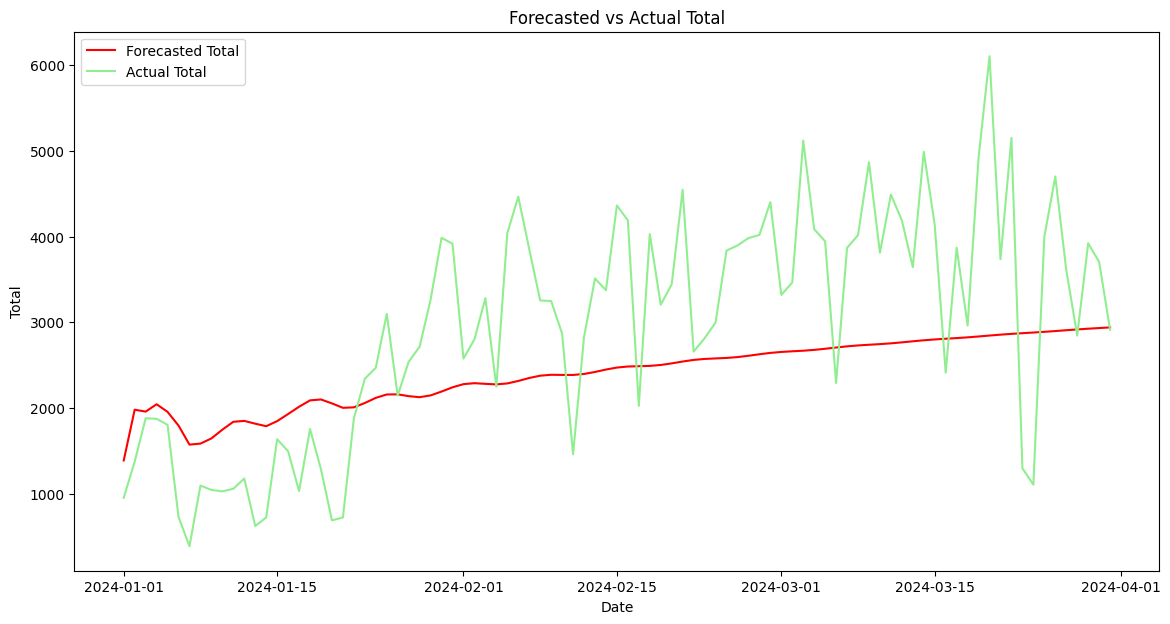

MSE: 1424322.7621289091, MAE: 999.5072838476295, RMSE: 1193.4499411910451


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

# Load the data from the CSV file
df = pd.read_csv('./munich_erhardt.csv')

# Assuming 'Date' is the correct column after inspecting df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use relevant columns
df_var = df[['Total', 'AvgTemp', 'RainfallVolume']]

# Check for missing values
missing_values = df_var.isnull().sum()
print(missing_values)

# Function to perform the Augmented Dickey-Fuller test
def adf_test(series, title=''):
    print(f'ADF Test on "{title}"')
    result = adfuller(series.dropna(), autolag='AIC')  # dropna() handles any NaN values that might affect the test
    print(f'  ADF Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'  Critical Value {key}: {value}')
    
    if result[1] <= 0.05:
        print("  => P-value <= 0.05. The series is stationary.\n")
    else:
        print("  => P-value > 0.05. The series is not stationary.\n")

for col in df_var.columns:
    adf_test(df_var[col], title=col)

# Instantiate and fit the VAR model
model = VAR(df_var)
lag_order = model.select_order(maxlags=15)
optimal_lag = lag_order.aic
results = model.fit(optimal_lag)
print(results.summary())

# Forecasting
forecast_steps = 91  # Adjust this based on your needs
forecast = results.forecast(df_var.values[-optimal_lag:], steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=df_var.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D'), columns=df_var.columns)
print(forecast_df)

# Load the January 2024 data without setting the 'Date' column as the index initially
df_2024 = pd.read_csv('munich2024.csv')

# Display the first few rows to inspect the column names
df_2024.head()

# Convert the 'Date' column to datetime and set it as the index
df_2024['Date'] = pd.to_datetime(df_2024['Date'])
df_2024.set_index('Date', inplace=True)

# Assuming 'gesamt' is the correct column after inspecting df_2024.head()
df_2024 = df_2024[['Total']]
df_2024.columns = ['Total']  # Rename the column to match the existing column name in the forecast_df

# Display the first few rows of the 2024 data
print(df_2024.head())

# Plot the forecasted values and the actual values
plt.figure(figsize=(14, 7))
plt.plot(forecast_df['Total'], label='Forecasted Total', color='red')
plt.plot(df_2024['Total'], label='Actual Total', color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Forecasted vs Actual Total')
plt.legend()
plt.show()


# Assuming you have actual values for the forecasted period, calculate error metrics
mse = mean_squared_error(df_2024['Total'], forecast_df['Total'])
mae = mean_absolute_error(df_2024['Total'], forecast_df['Total'])
rmse = mse ** 0.5
print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')


In [106]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Load the training dataset
training_data_path = './munich_erhardt.csv'
training_data = pd.read_csv(training_data_path)

# Load the testing dataset
testing_data_path = './munich2024.csv'
testing_data = pd.read_csv(testing_data_path)

# Prepare the training data: focusing on 'Date' and 'Total'
training_data['Date'] = pd.to_datetime(training_data['Date'])
training_series = training_data.set_index('Date')['Total']

# Fit the Holt-Winters model with an additive trend and additive seasonality
# Assuming daily data, let's consider a seasonal period of 365 days for annual seasonality
model = ExponentialSmoothing(training_series, trend="add", seasonal="add", seasonal_periods=365).fit()

# Prepare the testing data dates for prediction
testing_data['Date'] = pd.to_datetime(testing_data['Date'], format='%Y.%m.%d')
forecast_dates = testing_data['Date']

# Forecast the total counts for the testing data dates
predictions = model.forecast(len(forecast_dates))

# Convert predictions to a DataFrame for easier comparison
predictions_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Total': predictions.values})

predictions_df.head()

# Merge the forecasted totals with the actual totals from the testing dataset
comparison_df = pd.merge(predictions_df, testing_data[['Date', 'Total']], on='Date', how='left')
comparison_df.rename(columns={'Total': 'Actual_Total'}, inplace=True)

# Calculate the difference between forecasted and actual totals
comparison_df['Difference'] = comparison_df['Forecasted_Total'] - comparison_df['Actual_Total']

comparison_df.head()

/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Date,Forecasted_Total,Actual_Total,Difference
0,2024-01-01,1495.605963,954,541.605963
1,2024-01-02,1565.756820,1374,191.756820
2,2024-01-03,1415.630268,1881,-465.369732
3,2024-01-04,1661.604790,1875,-213.395210
4,2024-01-05,2105.818345,1804,301.818345


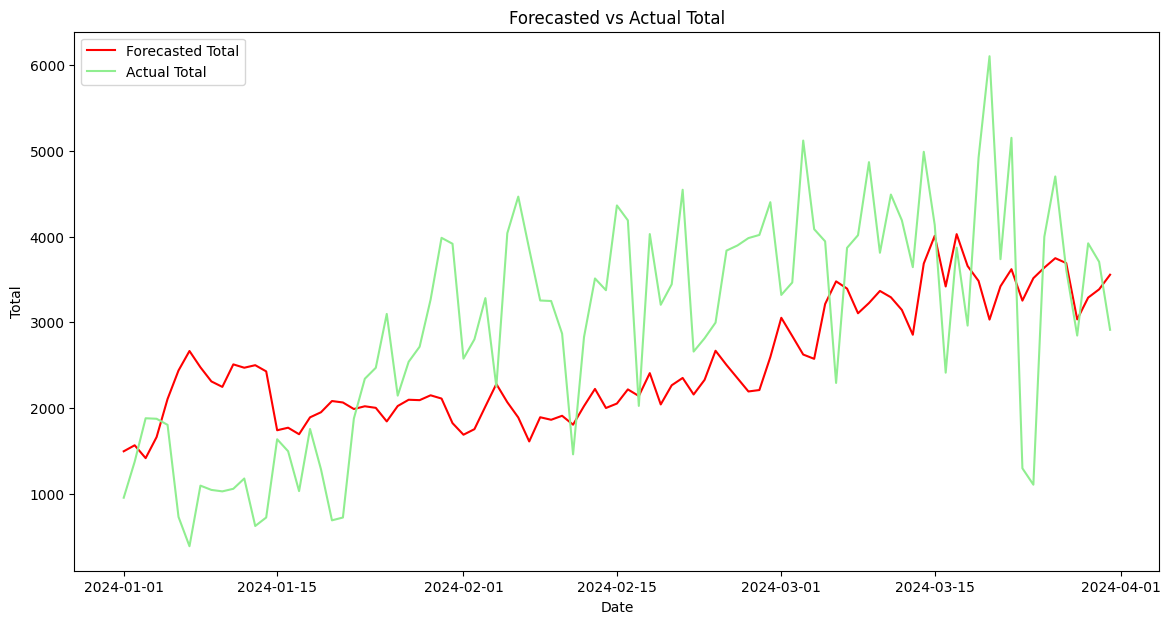

MSE: 1639985.55, MAE: 1067.26, RMSE: 1280.62


In [108]:
# plot the forecasted and actual values
plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Date'], comparison_df['Forecasted_Total'], label='Forecasted Total', color='red')
plt.plot(comparison_df['Date'], comparison_df['Actual_Total'], label='Actual Total', color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Forecasted vs Actual Total')
plt.legend()
plt.show()

# Calculate error metrics for the Holt-Winters model
mse = mean_squared_error(comparison_df['Actual_Total'], comparison_df['Forecasted_Total'])
mae = mean_absolute_error(comparison_df['Actual_Total'], comparison_df['Forecasted_Total'])
rmse = np.sqrt(mse)
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}')


In [110]:
## TCN Model
import pandas as pd
from datetime import datetime

# Load the training data
training_data_path = './munich_erhardt.csv'
training_data = pd.read_csv(training_data_path)
# Load the testing data
testing_data_path = './munich2024.csv'
testing_data = pd.read_csv(testing_data_path)

# Preprocessing training data: No major preprocessing needed beyond what's already discussed

# Preprocessing testing data
# Convert 'Date' format in testing data to match the training data format
testing_data['Date'] = pd.to_datetime(testing_data['Date'], format='%Y.%m.%d').dt.strftime('%Y-%m-%d')

# Selecting relevant columns (excluding 'bewoelkung' and 'sonnenstunden' for consistency with training data)
testing_data_relevant = testing_data[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume']].copy()

# Display the first few rows of the adjusted testing dataset to verify changes
testing_data_relevant.head()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Feature engineering for dates
training_data['Date'] = pd.to_datetime(training_data['Date'])
testing_data_relevant['Date'] = pd.to_datetime(testing_data_relevant['Date'])

# Extract day of year as a cyclical feature
training_data['DayOfYear'] = training_data['Date'].dt.dayofyear
testing_data_relevant['DayOfYear'] = testing_data_relevant['Date'].dt.dayofyear

# Normalize weather conditions and day of year feature
features_to_scale = ['MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfYear']
scaler = StandardScaler()

# Fit on training data
training_data_scaled = scaler.fit_transform(training_data[features_to_scale])
training_data_scaled = np.concatenate([training_data_scaled, training_data[['Total']].values], axis=1)

# Transform testing data
testing_data_scaled = scaler.transform(testing_data_relevant[features_to_scale])
testing_data_scaled = np.concatenate([testing_data_scaled, testing_data_relevant[['Total']].values], axis=1)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(training_data_scaled[:, :-1], training_data_scaled[:, -1], test_size=0.2, random_state=42)

# Output the shapes of the datasets as a sanity check
X_train.shape, X_val.shape, testing_data_scaled.shape

((3634, 4), (909, 4), (91, 5))

Epoch 1/100
114/114 [==============================] - 1s 5ms/step - loss: 20048574.0000 - val_loss: 17898988.0000
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: 8318533.5000 - val_loss: 2109009.5000
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 2029262.0000 - val_loss: 1778835.3750
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: 1766804.5000 - val_loss: 1678337.3750
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 1662001.7500 - val_loss: 1621113.2500
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 1599249.0000 - val_loss: 1588518.8750
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 1571070.6250 - val_loss: 1595085.0000
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: 1553250.2500 - val_loss: 1575654.5000
Epoch 9/100
114/114 [==============================] - 0s 2ms/step - loss: 1541336.8750 - val_

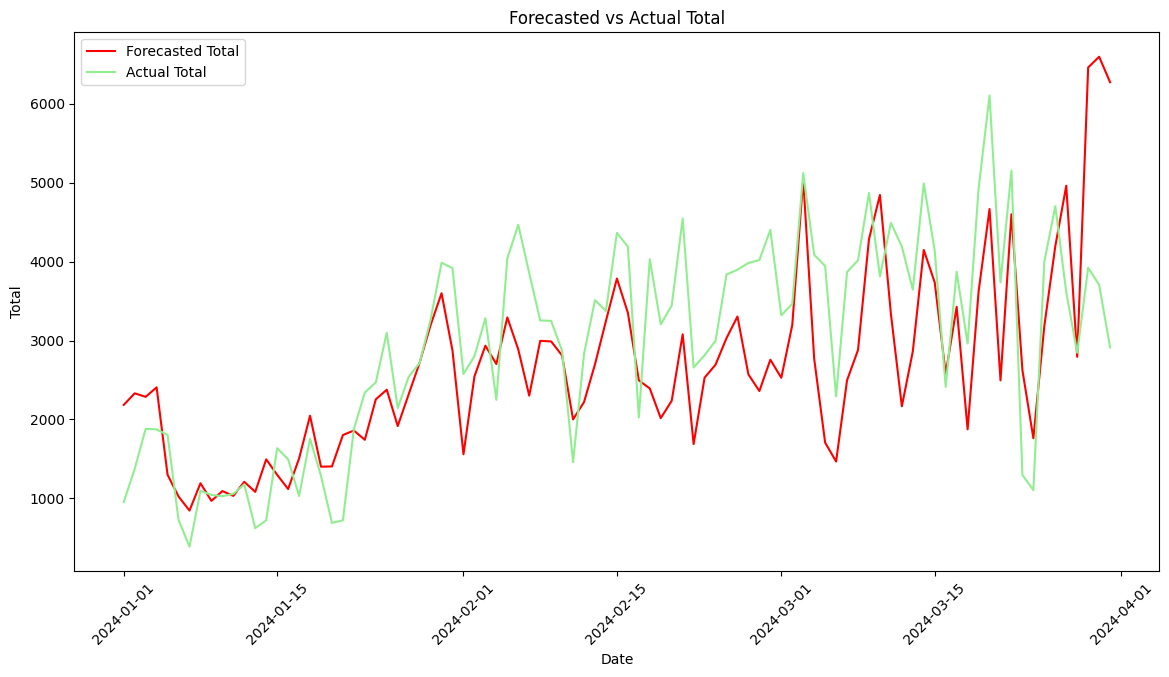

In [111]:
# Defining the TCN model
import tensorflow as tf
from tensorflow.keras import layers

def build_tcn_model(input_shape):
    i = layers.Input(shape=input_shape)
    x = layers.Dense(128, activation='relu')(i)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    x = layers.Dense(8, activation='relu')(x)
    x = layers.Dense(4, activation='relu')(x)
    x = layers.Dense(1)(x)
    model = tf.keras.Model(i, x)
    model.compile(optimizer='adam', loss='mse')
    return model

# Build the TCN model
model = build_tcn_model(input_shape=X_train.shape[1])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the testing data
test_loss = model.evaluate(testing_data_scaled[:, :-1], testing_data_scaled[:, -1])
test_loss

# Make predictions on the testing data
predictions = model.predict(testing_data_scaled[:, :-1])

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'Date': testing_data_relevant['Date'], 'Forecasted_Total': predictions.flatten()})
predictions_df.head()

# Plot the forecasted and actual values
plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Date'], predictions_df['Forecasted_Total'], label='Forecasted Total', color='red')
plt.plot(testing_data_relevant['Date'], testing_data_relevant['Total'], label='Actual Total', color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Forecasted vs Actual Total')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [112]:
# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(testing_data_relevant['Total'], predictions_df['Forecasted_Total'])
mae = mean_absolute_error(testing_data_relevant['Total'], predictions_df['Forecasted_Total'])
rmse = np.sqrt(mse)

# Print the error metrics
print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 1025536.9655123438, MAE: 780.8386478633671, RMSE: 1012.6879902084075


21:39:11 - cmdstanpy - INFO - Chain [1] start processing
21:39:11 - cmdstanpy - INFO - Chain [1] done processing
/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The beh

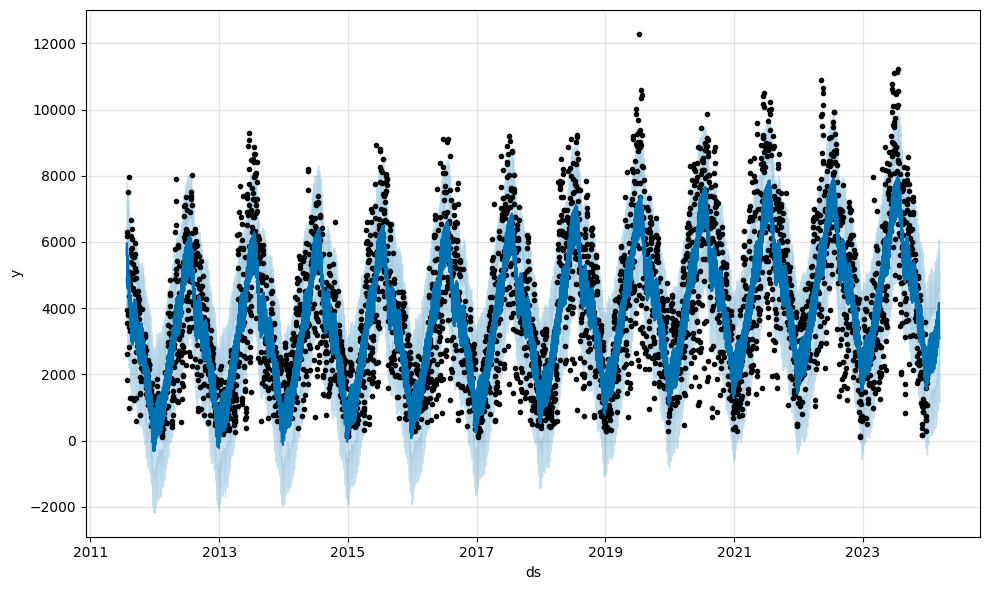

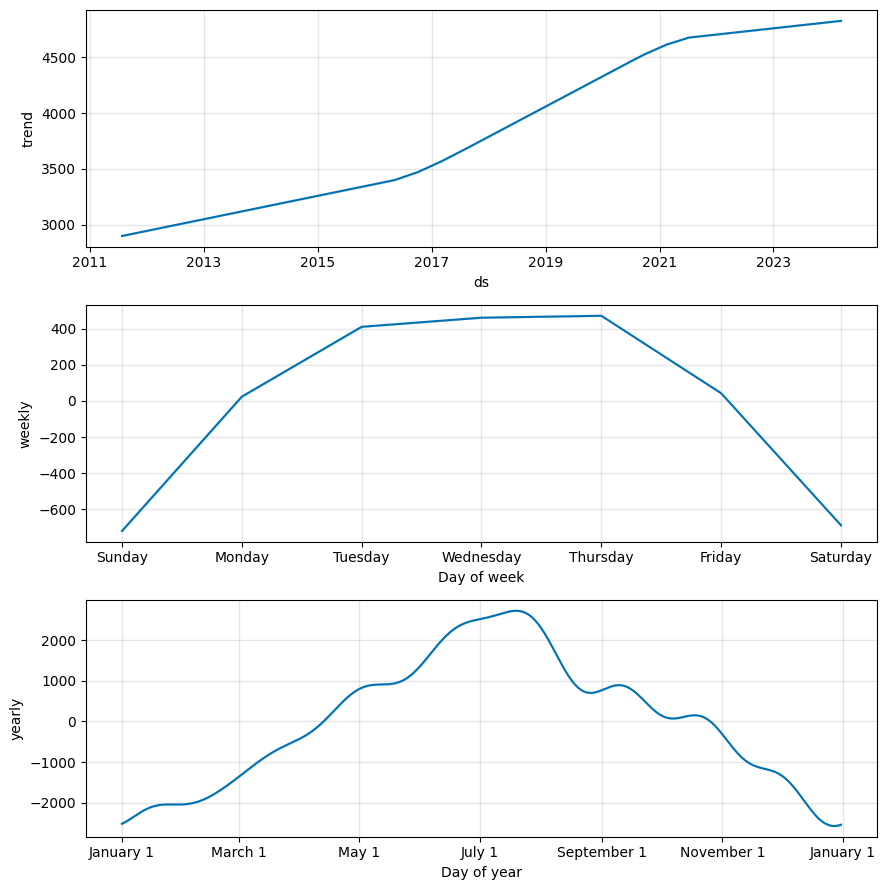

In [119]:
# Load the training data
training_data_path = './munich_erhardt.csv'
training_data = pd.read_csv(training_data_path)
# Load the testing data
testing_data_path = './munich2024.csv'
testing_data = pd.read_csv(testing_data_path)

# Prepare the data for Prophet
# Selecting relevant columns
training_data_prophet = training_data[['Date', 'Total']].copy()
testing_data_prophet = testing_data[['Date', 'Total']].copy()

# Rename the columns to 'ds' and 'y' for Prophet
training_data_prophet.columns = ['ds', 'y']
testing_data_prophet.columns = ['ds', 'y']

# We fit the model by instantiating a new `Prophet` object. Any settings to the forecasting procedure are passed into the constructor. Then you call its `fit` method and pass in the historical dataframe.
model = Prophet()
model.fit(training_data_prophet)

# Future dataframe with the dates for which we want a prediction
future = model.make_future_dataframe(periods=70)
future.tail()

# The `predict` method assigns each row in `future` a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Plot the forecast
fig1 = model.plot(forecast)

# Plot the forecast components
fig2 = model.plot_components(forecast)

21:41:36 - cmdstanpy - INFO - Chain [1] start processing
21:41:36 - cmdstanpy - INFO - Chain [1] done processing


Test RMSE: 1058.796
Test MAE: 868.042


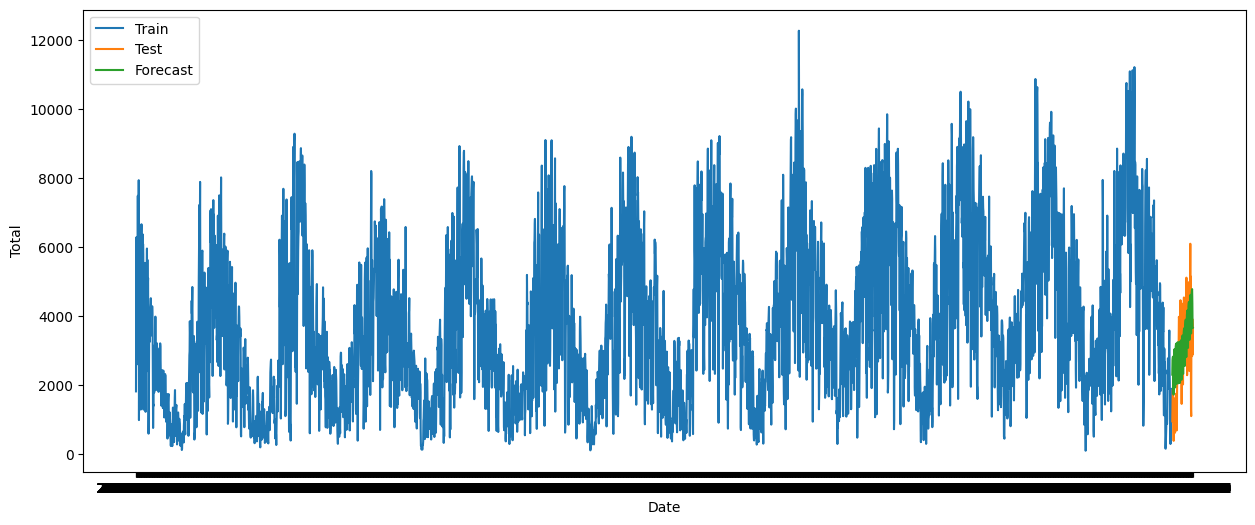

In [120]:
# split the data into train and test sets
#train = df_prophet.iloc[:int(len(df_prophet)*0.7)]
#test = df_prophet.iloc[int(len(df_prophet)*0.7):]


# Fit the model to the training data
model = Prophet()
model.fit(training_data_prophet)

# Make predictions
forecast = model.predict(testing_data_prophet)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(testing_data_prophet['y'], forecast['yhat']))
mae = mean_absolute_error(testing_data_prophet['y'], forecast['yhat'])
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

# Visualize the forecast using matplotlib
plt.figure(figsize=(15, 6))
plt.plot(training_data_prophet['ds'], training_data_prophet['y'], label='Train')
plt.plot(testing_data_prophet['ds'], testing_data_prophet['y'], label='Test')
plt.plot(testing_data_prophet['ds'], forecast['yhat'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()


21:35:29 - cmdstanpy - INFO - Chain [1] start processing
21:35:31 - cmdstanpy - INFO - Chain [1] done processing
/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/caropaez/anaconda3/envs/thesis_env/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The beh

Test RMSE: 1150.824
Test MAE: 907.082


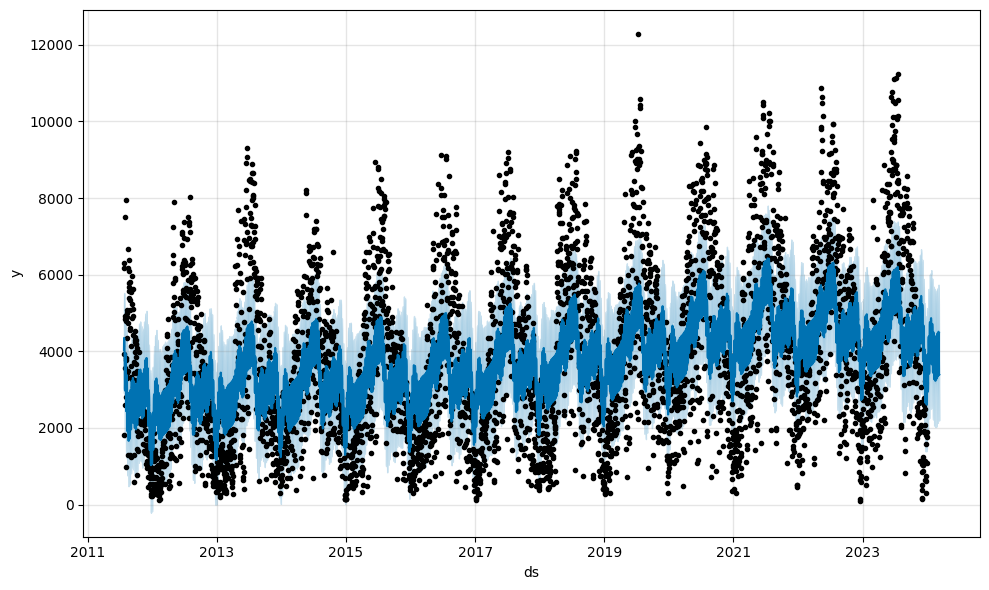

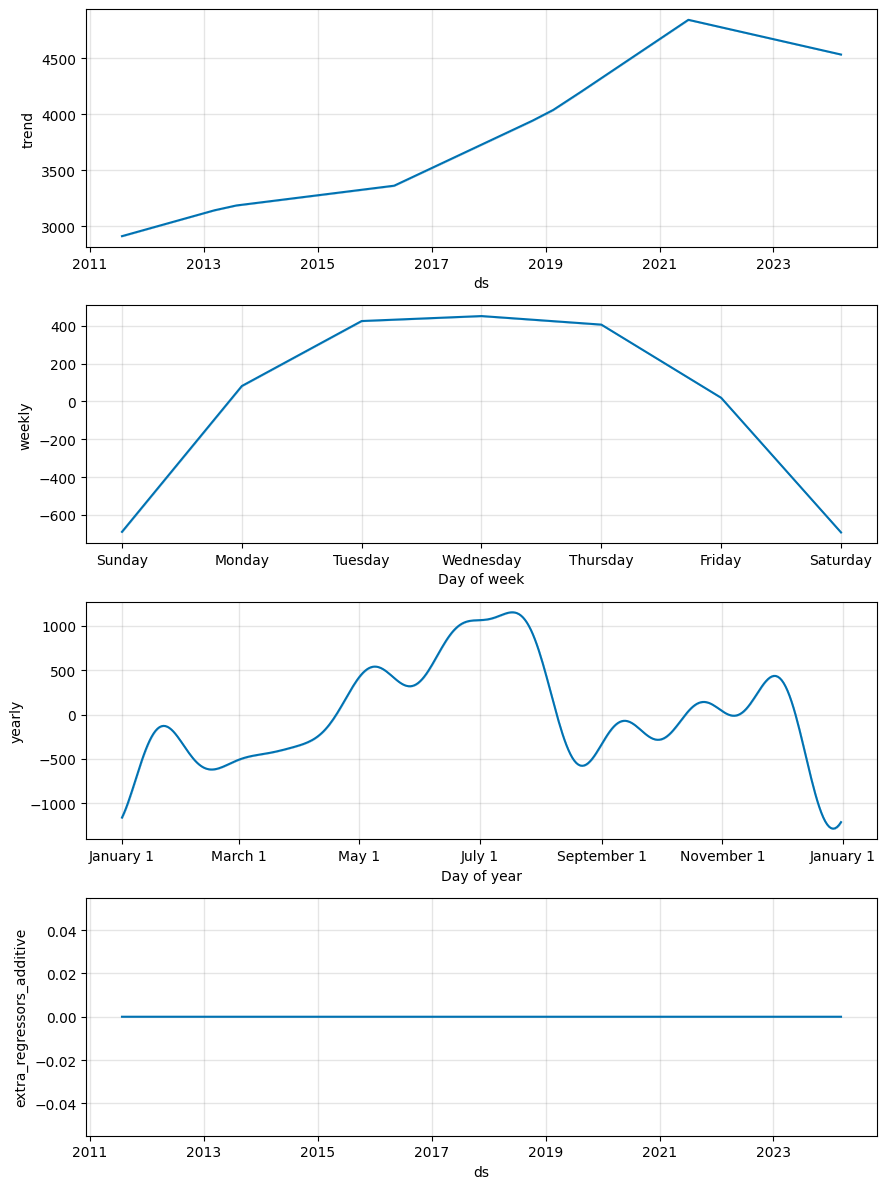

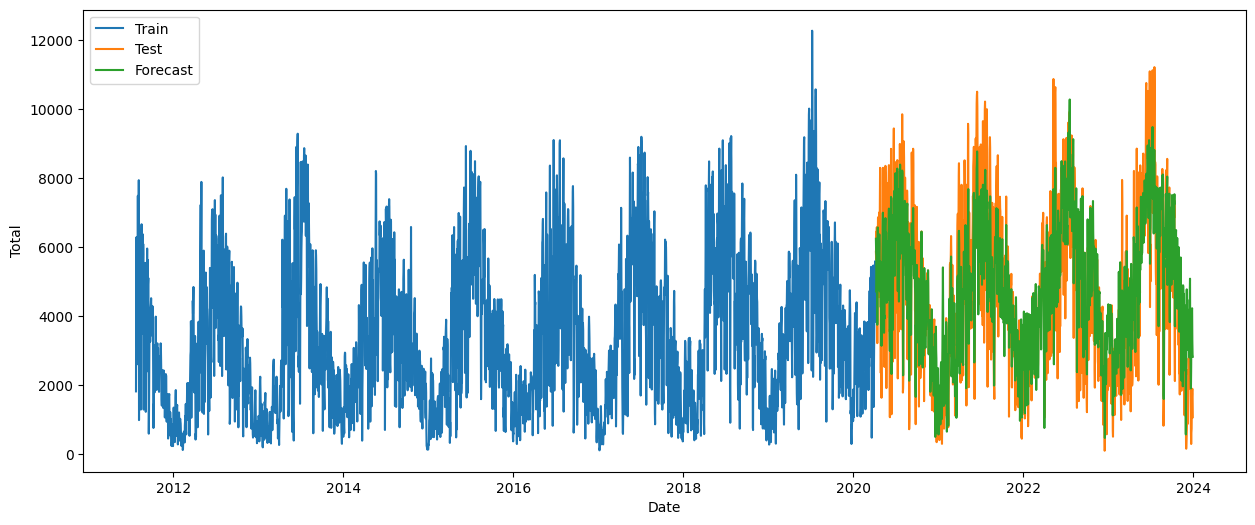

In [118]:
# Now we want to improve the model by adding the temperature and rainfall volume as additional regressors. We can do this by adding the columns to the dataframe before fitting the model.
# Prepare the data for the Prophet model
df_prophet = df_location_erhardt.reset_index()
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Total': 'y'})
df_prophet = df_prophet[['ds', 'y', 'MinTemp', 'MaxTemp', 'RainfallVolume']]
# We fit the model by instantiating a new `Prophet` object. Any settings to the forecasting procedure are passed into the constructor. Then you call its `fit` method and pass in the historical dataframe.
model = Prophet()
model.add_regressor('MinTemp')
model.add_regressor('MaxTemp')
model.add_regressor('RainfallVolume')
model.fit(df_prophet)

# Future dataframe with the dates for which we want a prediction
future = model.make_future_dataframe(periods=70)
future['MinTemp'] = df_location_erhardt['MinTemp'].values.mean()
future['MaxTemp'] = df_location_erhardt['MaxTemp'].values.mean()
future['RainfallVolume'] = df_location_erhardt['RainfallVolume'].values.mean()
future.tail()

# The `predict` method assigns each row in `future` a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)

# Plot the forecast components
fig2 = model.plot_components(forecast)

# split the data into train and test sets
train = df_prophet.iloc[:int(len(df_prophet)*0.7)]
test = df_prophet.iloc[int(len(df_prophet)*0.7):]

# Fit the model to the training data
model = Prophet()
model.add_regressor('MinTemp')
model.add_regressor('MaxTemp')
model.add_regressor('RainfallVolume')
model.fit(train)

# Make predictions
future = test.drop('y', axis=1)
future['MinTemp'] = test['MinTemp']
future['MaxTemp'] = test['MaxTemp']
future['RainfallVolume'] = test['RainfallVolume']
forecast = model.predict(future)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat']))
mae = mean_absolute_error(test['y'], forecast['yhat'])
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

# Visualize the forecast using matplotlib
plt.figure(figsize=(15, 6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(test['ds'], forecast['yhat'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

MSE: 932611.58
MAE: 707.92
RMSE: 965.72


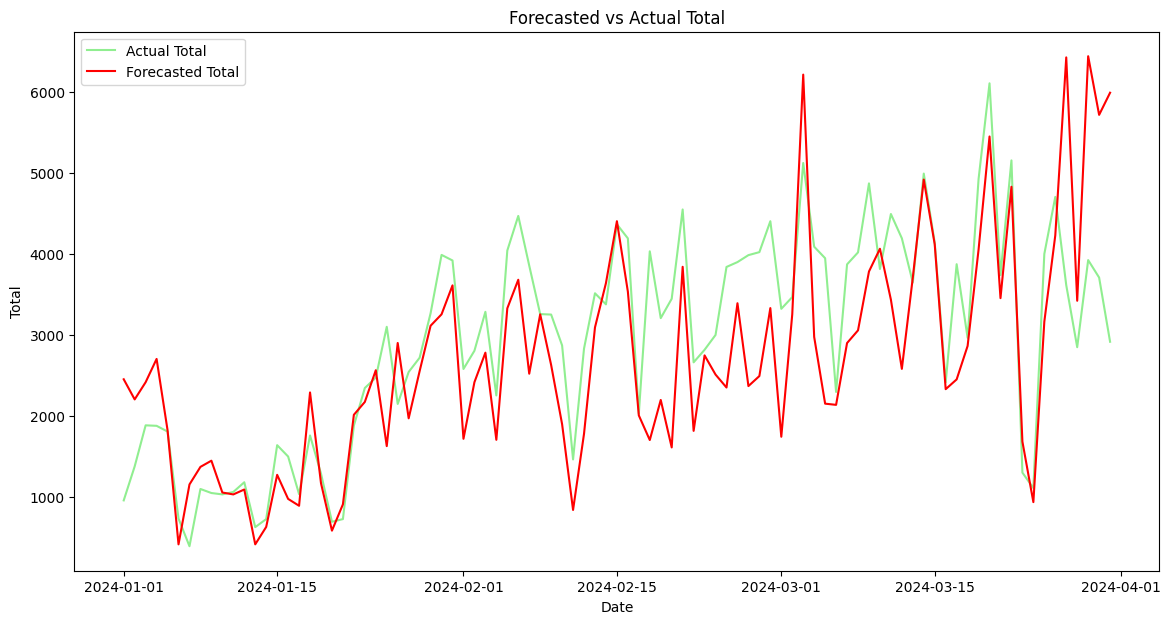

In [121]:
# Now we will try the XGBoost model to forecast the total number of cyclists per day in Munich (Erhardt). 
# We will use the historical data to train the model and make predictions for the future.
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data_path = './munich_erhardt.csv'
data = pd.read_csv(data_path)

# Prepare the data
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the day of the week and month from the date
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month

# Select the relevant columns for the model
data = data[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfWeek', 'Month']]
data.head()

# Use the data from munich_2024 for testing
data_test_path = './munich2024.csv'
data_test = pd.read_csv(data_test_path)

# Convert the 'Date' column to datetime format
data_test['Date'] = pd.to_datetime(data_test['Date'])

# Extract the day of the week and month from the date
data_test['DayOfWeek'] = data_test['Date'].dt.dayofweek
data_test['Month'] = data_test['Date'].dt.month

# Select the relevant columns for the model
data_test = data_test[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfWeek', 'Month']]
data_test.head()

# Split the data into features (X) and target variable (y)
X_train = data.drop(['Date', 'Total'], axis=1)
y_train = data['Total']
X_test = data_test.drop(['Date', 'Total'], axis=1)
y_test = data_test['Total']

# Initialize the XGBoost model
model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

# Visualize the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_test['Date'], y_test, label='Actual Total', color='lightgreen')
plt.plot(data_test['Date'], y_pred, label='Forecasted Total', color='red')
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Forecasted vs Actual Total')
plt.legend()
plt.show()



MSE: 975548.02
MAE: 706.53
RMSE: 987.70


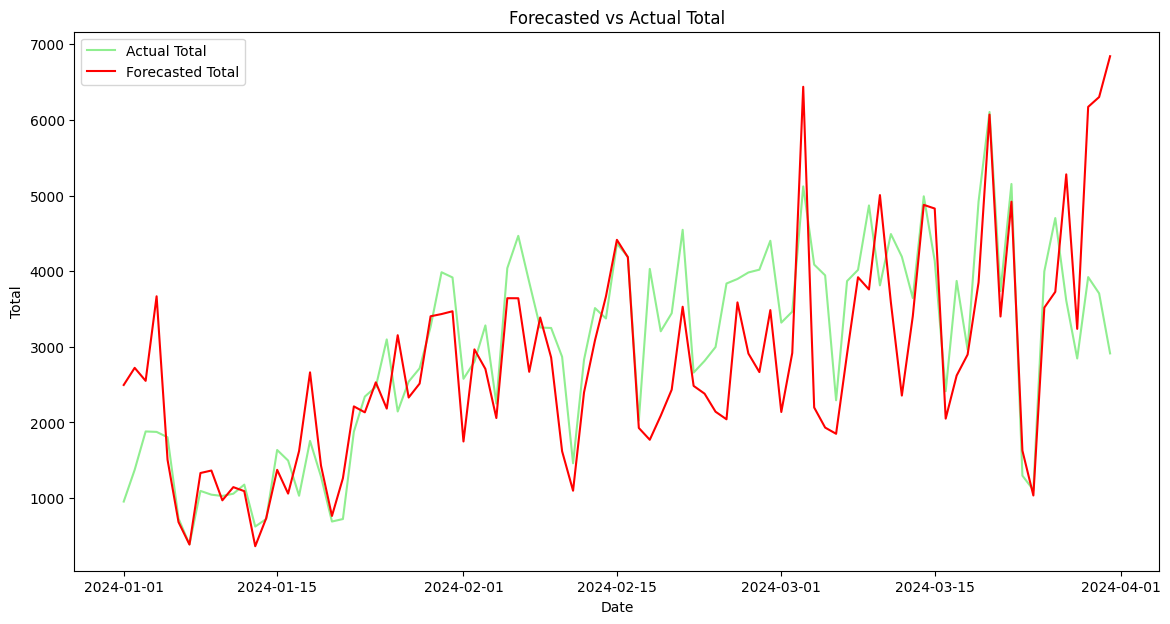

In [122]:
# Another model to forecast the total number of cyclists per day in Munich (Erhardt) is the Random Forest Regressor.
# We will use the historical data to train the model and make predictions for the future.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data_path = './munich_erhardt.csv'
data = pd.read_csv(data_path)

# Load the testing data
data_test_path = './munich2024.csv'
data_test = pd.read_csv(data_test_path)

# Prepare the data
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data_test['Date'] = pd.to_datetime(data_test['Date'])

# Extract the day of the week and month from the date
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data_test['DayOfWeek'] = data_test['Date'].dt.dayofweek
data_test['Month'] = data_test['Date'].dt.month

# Select the relevant columns for the model
data = data[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfWeek', 'Month']]
data_test = data_test[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfWeek', 'Month']]
data.head()

# Split the data into features (X) and target variable (y)
X_train = data.drop(['Date', 'Total'], axis=1)
y_train = data['Total']
X_test = data_test.drop(['Date', 'Total'], axis=1)
y_test = data_test['Total']

# Initialize the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

# Visualize the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_test['Date'], y_test, label='Actual Total', color='lightgreen')
plt.plot(data_test['Date'], y_pred, label='Forecasted Total', color='red')
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Forecasted vs Actual Total')
plt.legend()
plt.show()



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 4543, number of used features: 5
[LightGBM] [Info] Start training from score 3836.123707
MSE: 869293.78
MAE: 708.50
RMSE: 932.36


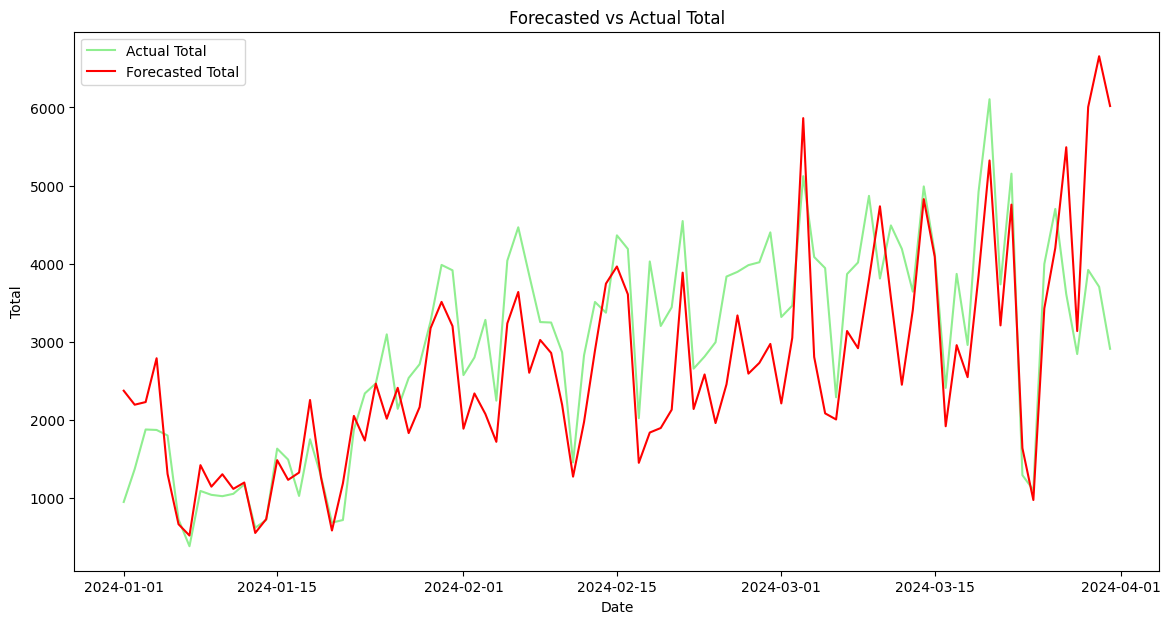

In [126]:
# Another model to forecast the total number of cyclists per day in Munich (Erhardt) is the LightGBM Regressor.
# We will use the historical data to train the model and make predictions for the future.

# Import LGBMRegressor() from lightgbm
from lightgbm import LGBMRegressor

# Load the data
data_path = './munich_erhardt.csv'
data = pd.read_csv(data_path)

# Load the testing data
data_test_path = './munich2024.csv'
data_test = pd.read_csv(data_test_path)

# Prepare the data
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data_test['Date'] = pd.to_datetime(data_test['Date'])

# Extract the day of the week and month from the date
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data_test['DayOfWeek'] = data_test['Date'].dt.dayofweek
data_test['Month'] = data_test['Date'].dt.month

# Select the relevant columns for the model
data = data[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfWeek', 'Month']]
data_test = data_test[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfWeek', 'Month']]
data.head()

# Split the data into features (X) and target variable (y)
X_train = data.drop(['Date', 'Total'], axis=1)
y_train = data['Total']
X_test = data_test.drop(['Date', 'Total'], axis=1)
y_test = data_test['Total']

# Initialize the LightGBM Regressor model
model = LGBMRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

# Visualize the forecast

plt.figure(figsize=(14, 7))
plt.plot(data_test['Date'], y_test, label='Actual Total', color='lightgreen')
plt.plot(data_test['Date'], y_pred, label='Forecasted Total', color='red')
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Forecasted vs Actual Total')
plt.legend()
plt.show()


Learning rate set to 0.052004
0:	learn: 2195.7696555	total: 5.89ms	remaining: 5.89s
1:	learn: 2120.7222964	total: 6.91ms	remaining: 3.44s
2:	learn: 2051.5571736	total: 7.89ms	remaining: 2.62s
3:	learn: 1985.4115215	total: 9.02ms	remaining: 2.25s
4:	learn: 1924.7581004	total: 10.3ms	remaining: 2.05s
5:	learn: 1864.2766720	total: 11.5ms	remaining: 1.9s
6:	learn: 1811.5893195	total: 12.7ms	remaining: 1.81s
7:	learn: 1759.3872794	total: 13.8ms	remaining: 1.71s
8:	learn: 1714.1140915	total: 14.7ms	remaining: 1.62s
9:	learn: 1669.6997367	total: 15.9ms	remaining: 1.57s
10:	learn: 1623.8401610	total: 17.3ms	remaining: 1.55s
11:	learn: 1584.3837921	total: 18.5ms	remaining: 1.52s
12:	learn: 1546.5471664	total: 19.6ms	remaining: 1.49s
13:	learn: 1513.7509235	total: 20.7ms	remaining: 1.46s
14:	learn: 1480.0077021	total: 21.8ms	remaining: 1.43s
15:	learn: 1449.4275207	total: 22.8ms	remaining: 1.4s
16:	learn: 1419.3714123	total: 23.9ms	remaining: 1.38s
17:	learn: 1395.9757846	total: 25ms	remaining: 

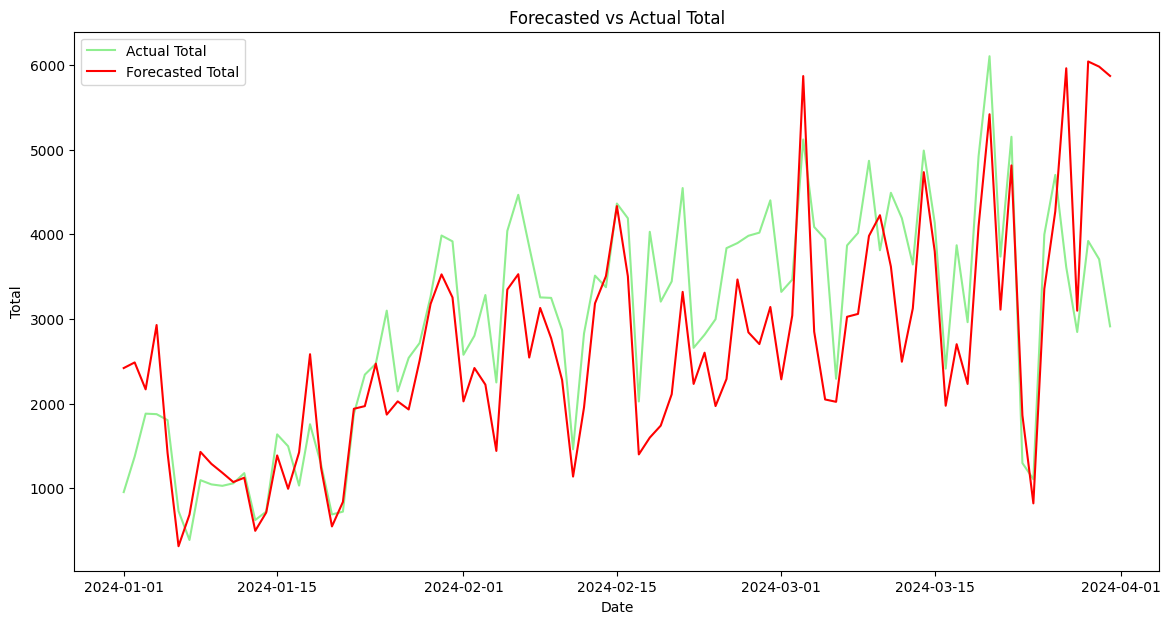

In [152]:
# Another model to forecast the total number of cyclists per day in Munich (Erhardt) is the CatBoost Regressor.
# We will use the historical data to train the model and make predictions for the future.

# Import CatBoostRegressor from catboost
from catboost import CatBoostRegressor

# Load the data
data_path = './munich_erhardt.csv'
data = pd.read_csv(data_path)

# Load the testing data
data_test_path = './munich2024.csv'
data_test = pd.read_csv(data_test_path)

# Prepare the data
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data_test['Date'] = pd.to_datetime(data_test['Date'])

# Extract the day of the week and month from the date
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data_test['DayOfWeek'] = data_test['Date'].dt.dayofweek
data_test['Month'] = data_test['Date'].dt.month

# Select the relevant columns for the model
data = data[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfWeek', 'Month']]
data_test = data_test[['Date', 'Total', 'MinTemp', 'MaxTemp', 'RainfallVolume', 'DayOfWeek', 'Month']]
data.head()

# Split the data into features (X) and target variable (y)
X_train = data.drop(['Date', 'Total'], axis=1)
y_train = data['Total']
X_test = data_test.drop(['Date', 'Total'], axis=1)
y_test = data_test['Total']

# Initialize the CatBoost Regressor model
model = CatBoostRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

# Visualize the forecast

plt.figure(figsize=(14, 7))
plt.plot(data_test['Date'], y_test, label='Actual Total', color='lightgreen')
plt.plot(data_test['Date'], y_pred, label='Forecasted Total', color='red')
plt.xlabel('Date')
plt.ylabel('Total')
plt.title('Forecasted vs Actual Total')
plt.legend()
plt.show()



In [163]:
# Now we want to try and add an exogenous variable to the model to improve the forecast.
# The exogenous variable we will use is if a date was a public holiday or not.
# We will use the historical data to train the model and make predictions for the future.

# Load the data
data_path = './munich_erhardt.csv'
data = pd.read_csv(data_path)

# Load the testing data
data_test_path = './munich2024.csv'
data_test = pd.read_csv(data_test_path)

# Add a new column with only 0 values to the data and data_test called IsHoliday
data['IsHoliday'] = 0
data_test['IsHoliday'] = 0

# Prepare the data
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data_test['Date'] = pd.to_datetime(data_test['Date'])

# Extract the day of the week and month from the date
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data_test['DayOfWeek'] = data_test['Date'].dt.dayofweek
data_test['Month'] = data_test['Date'].dt.month

# Set Date as index
data.set_index('Date', inplace=True)
data_test.set_index('Date', inplace=True)

# For all 25, 26 and 31.12 of each year set "IsHoliday" to 1, also 01.01
data.loc[(data.index.month == 12) & (data.index.day == 31), 'IsHoliday'] = 1
data_test.loc[(data_test.index.month == 12) & (data_test.index.day == 31), 'IsHoliday'] = 1
data.loc[(data.index.month == 12) & (data.index.day == 25), 'IsHoliday'] = 1
data_test.loc[(data_test.index.month == 12) & (data_test.index.day == 25), 'IsHoliday'] = 1
data.loc[(data.index.month == 12) & (data.index.day == 26), 'IsHoliday'] = 1
data_test.loc[(data_test.index.month == 12) & (data_test.index.day == 26), 'IsHoliday'] = 1
data.loc[(data.index.month == 1) & (data.index.day == 1), 'IsHoliday'] = 1
data_test.loc[(data_test.index.month == 1) & (data_test.index.day == 1), 'IsHoliday'] = 1
data.loc[(data.index.month == 5) & (data.index.day == 1), 'IsHoliday'] = 1
data_test.loc[(data_test.index.month == 5) & (data_test.index.day == 1), 'IsHoliday'] = 1
data.loc[(data.index.month == 10) & (data.index.day == 3), 'IsHoliday'] = 1
data_test.loc[(data_test.index.month == 10) & (data_test.index.day == 3), 'IsHoliday'] = 1

data.loc[(data.index.month == 1) & (data.index.day == 6), 'IsHoliday'] = 1
data_test.loc[(data_test.index.month == 1) & (data_test.index.day == 6), 'IsHoliday'] = 1


print(data_test.head(31))

           uhrzeit_start  uhrzeit_ende Location  richtung_1  richtung_2  \
Date                                                                      
2024-01-01         00:00         23.59  Erhardt         493         461   
2024-01-02         00:00         23.59  Erhardt         687         687   
2024-01-03         00:00         23.59  Erhardt         953         928   
2024-01-04         00:00         23.59  Erhardt         904         971   
2024-01-05         00:00         23.59  Erhardt         924         880   
2024-01-06         00:00         23.59  Erhardt         366         364   
2024-01-07         00:00         23.59  Erhardt         182         206   
2024-01-08         00:00         23.59  Erhardt         527         568   
2024-01-09         00:00         23.59  Erhardt         508         537   
2024-01-10         00:00         23.59  Erhardt         493         535   
2024-01-11         00:00         23.59  Erhardt         512         546   
2024-01-12         00:00 